In [1]:
## Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

In [5]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [6]:
# Checkinh null % in the data

(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### Handling Missing Values

In [7]:
# Leveraging Mean and Median for imputation of NULL Values

data['Item_Weight_mean'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Item_Weight_median'] = data['Item_Weight'].fillna(data['Item_Weight'].median())

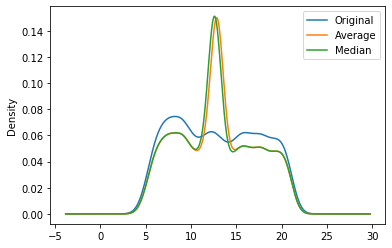

In [8]:
data['Item_Weight'].plot(kind = 'kde',label="Original")
data['Item_Weight_mean'].plot(kind = 'kde',label= "Average")
data['Item_Weight_median'].plot(kind = 'kde',label= "Median")

plt.legend()
plt.show()

### Handling missing values for Outlet_Size

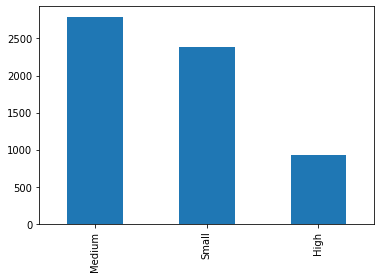

In [9]:
data['Outlet_Size'].value_counts().plot(kind = 'bar');

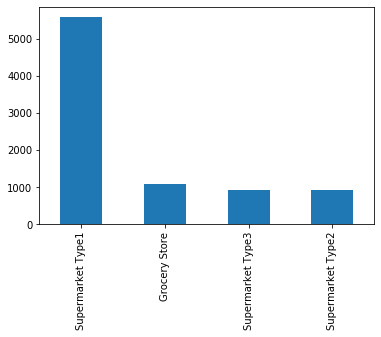

In [10]:
data['Outlet_Type'].value_counts().plot(kind = 'bar');

In [11]:
data.groupby(['Outlet_Type','Outlet_Size'])['Outlet_Size'].count().reset_index(name = 'Count')

,Outlet_Type,Outlet_Size,Count
0,Grocery Store,Small,528
1,Supermarket Type1,High,932
2,Supermarket Type1,Medium,930
3,Supermarket Type1,Small,1860
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935


#### Leveraging Mode Values accross Outlet Type to fill the Missing Values

In [12]:
mode_store = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [13]:
missing_values = data['Outlet_Size'].isnull()

In [14]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_store[x])

In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_median              0
dtype: int64

### Standardizing Item Fat Content

In [16]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}}, inplace= True)

In [17]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### EDA

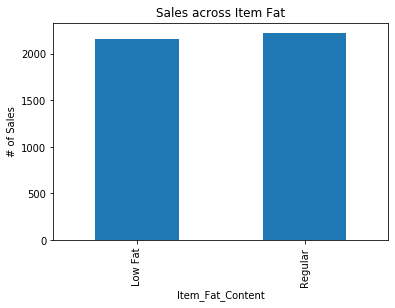

In [18]:
plt.title("Sales across Item Fat")
data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot(kind= 'bar');
plt.ylabel("# of Sales")
plt.show()

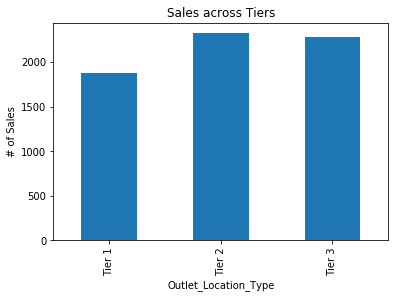

In [19]:
plt.title("Sales across Tiers")
data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot(kind= 'bar');
plt.ylabel("# of Sales")
plt.show()

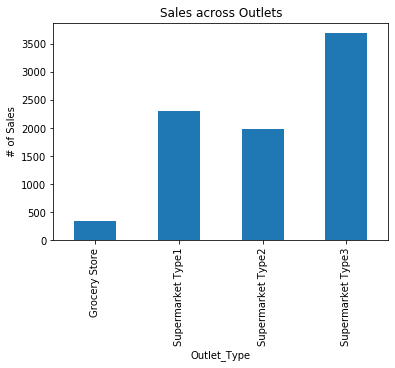

In [20]:
plt.title("Sales across Outlets")
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind= 'bar');
plt.ylabel("# of Sales")
plt.show()

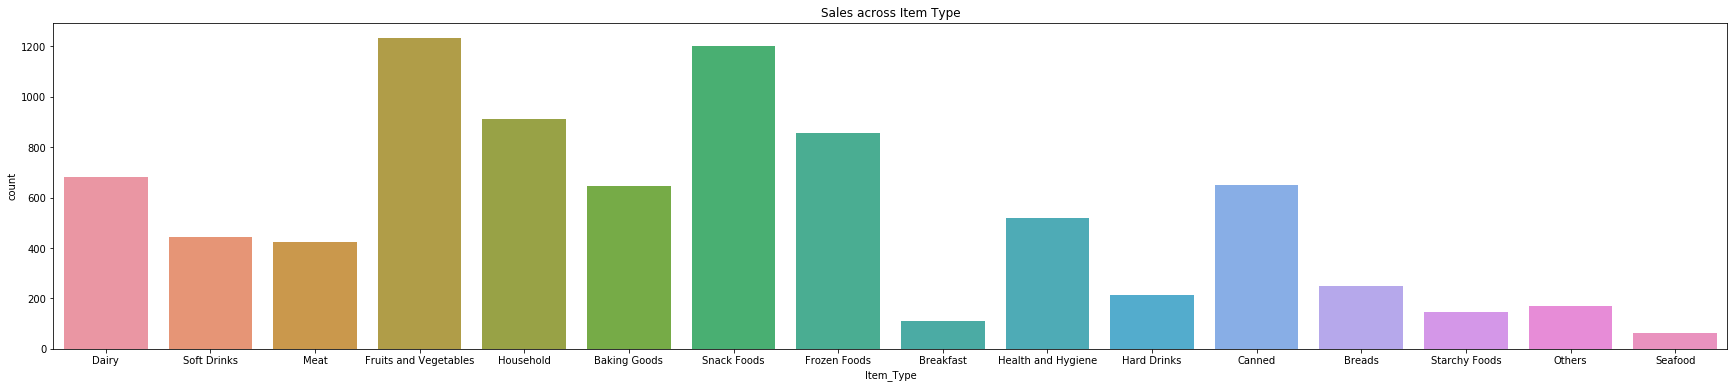

In [21]:
plt.figure(figsize=(30,6))
plt.title("Sales across Item Type")
sns.countplot(x='Item_Type', data=data)
plt.show()

In [22]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123,1.000000,1.000000
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625,-0.012049,-0.014168
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574,0.024756,0.024951
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135,-0.008301,0.007739
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000,0.011550,0.009693
Item_Weight_mean,1.000000,-0.012049,0.024756,-0.008301,0.011550,1.000000,0.999736
Item_Weight_median,1.000000,-0.014168,0.024951,0.007739,0.009693,0.999736,1.000000


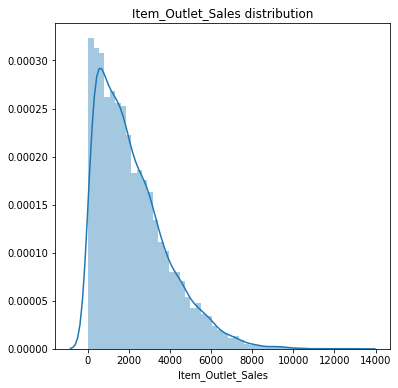

In [23]:
plt.figure(figsize=(6,6))
plt.title('Item_Outlet_Sales distribution')
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

### Standardizing Item Fat Identifier

In [24]:
## Staandardizing the Item Identifier
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[:2])

In [25]:
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

### Calculating Store age as to understand the relationship between the age of the Store and Sales

In [26]:
import datetime as dt

In [27]:
data['Store_age'] = dt.datetime.today().year - data['Outlet_Establishment_Year']

In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Store_age
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,26
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,16
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,26
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,19.20,27
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,38


In [29]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_median              0
Store_age                       0
dtype: int64

In [30]:
data.drop('Outlet_Establishment_Year',axis=1, inplace=True)
data.drop('Item_Weight',axis=1, inplace=True)
data.drop('Item_Weight_median',axis=1, inplace=True)

### Converting Categorical variables into Numerical by leveraging Ordinal Encoder

In [31]:
## Creating function to to encode the features as we have to frequently use the same functionality

from sklearn.preprocessing import OrdinalEncoder

def encoded(data):
    data_encoded = data.copy()

    cat_cols = data.select_dtypes(include=['object']).columns

    for col in cat_cols:
        oe = OrdinalEncoder()
        data_encoded[col] = oe.fit_transform(data_encoded[[col]])
    
    return data_encoded

In [32]:
data_encoded = encoded(data)

In [33]:
data_encoded.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean', 'Store_age'],
      dtype='object')

In [34]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Store_age
0,1.0,0.0,0.016047,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,26
1,0.0,1.0,0.019278,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,16
2,1.0,0.0,0.016760,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,26
3,1.0,1.0,0.000000,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,27
4,2.0,0.0,0.000000,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,38


In [35]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

### Building Random Forest by leveraging Cross validation technique

In [36]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5512066973313707


### Building XGBoost as it sequentially corrects the error of weak learner

In [37]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5951745916367168


In [38]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
8,Outlet_Type,0.409898
10,Store_age,0.164803
5,Outlet_Identifier,0.156685
4,Item_MRP,0.138621
6,Outlet_Size,0.111130
7,Outlet_Location_Type,0.010939
2,Item_Visibility,0.002478
3,Item_Type,0.002243
9,Item_Weight_mean,0.001718
0,Item_Identifier,0.000976


#### Levrarging Feature Importance to identify Significant Features
#### Retraining the model on Significant features only

In [39]:
X = X.drop(columns=['Item_Visibility','Item_Weight_mean',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [40]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5955052124494136


### Splitting the data into Train and Test to calculate MAE and understand the model Performance

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.20,
                                                 random_state=42)
xg1 = xg.fit(X_train,y_train)

In [42]:
y_pred = xg1.predict(X_test)
mean_absolute_error(y_test,y_pred)

714.1675517389828

### Leveraging Grid Search CV to fientune Hyperparameters

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf2 = XGBRFRegressor()
param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [5,6,9]
}
grid_search = GridSearchCV(rf2,param_grid,cv = 5, scoring = 'r2')
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'n_estimators': 100}


In [45]:
grid_pred = grid_search.predict(X_test)

In [46]:
mean_absolute_error(y_test,grid_pred)

714.4170312945823

#### Even with Grid Search CV no impact on the performance of the Model has been noticed

### Creating a Function for the Data Pre-Processing of Test data

In [47]:
def preprocessing(data):
    mode_store = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
    missing_values = data['Outlet_Size'].isnull()
    data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_store[x])
    data['Store_age'] = dt.datetime.today().year - data['Outlet_Establishment_Year']
    data.drop('Outlet_Establishment_Year',axis=1, inplace=True)
    data.drop('Item_Weight',axis=1, inplace=True)
    data.drop('Item_Visibility',axis=1, inplace=True)
    data.drop('Outlet_Location_Type',axis=1, inplace=True)
    data.drop('Item_Type',axis=1, inplace=True)
    data.drop('Item_Identifier',axis=1, inplace=True)
    data.drop('Item_Fat_Content',axis=1, inplace=True)
    
    return data

## Reading Test file for Predictions

In [48]:
test = pd.read_csv('test.csv')

In [49]:
test_2 = test.copy()

In [50]:
test_data = preprocessing(test_2)
test_data = encoded(test_2)

In [51]:
test_data.head()

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Store_age
0,107.8622,9.0,1.0,1.0,26
1,87.3198,2.0,2.0,1.0,18
2,241.7538,0.0,2.0,0.0,27
3,155.0340,2.0,2.0,1.0,18
4,234.2300,5.0,1.0,3.0,40


#### Leveraging the best model we have trained above to predict

In [52]:
test_pred = xg1.predict(test_data)

In [53]:
test['Item_Outlet_Sales'] = test_pred

In [54]:
## Creating the submission file to submit in Hackathon
test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv('result.csv')

## Developing New models at different levels for better Predictions

<h6> - Here we are creating different models across Item Fat Content, Outlet Location Type and Outlet Type</h6>
<h6> - We are trying to capture sales behavior which differs across Outlet, Location and Item Fat Content Type</h6>
<h6> - This could help us in capturing different behavior which could get neglected at an overall level</h6>

In [55]:
def encoder_fun(test):
    test_encoded = test.copy()
    cat_cols = test.select_dtypes(include=['object']).columns

    for col in cat_cols:
        oe = OrdinalEncoder()
        test_encoded[col] = oe.fit_transform(test_encoded[[col]])
        
    test_encoded = test_encoded.drop(columns=['Item_Visibility',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)
    return test_encoded

In [56]:
def model(data_encoded):
    X = data_encoded.drop('Item_Outlet_Sales',axis=1)
    y = data_encoded['Item_Outlet_Sales']
    X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.20,
                                                 random_state=42)
    xg1 = xg.fit(X_train,y_train)
    y_pred = xg1.predict(X_test)
    print(mean_absolute_error(y_test,y_pred))

In [57]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Store_age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,26
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,16
2,FD,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,26
3,FD,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,27
4,NC,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,38


## Item Fat

In [58]:
low = data[data['Item_Fat_Content']=='Low Fat']
regular = data[data['Item_Fat_Content']=='Regular']

In [59]:
low = encoder_fun(low)
regular = encoder_fun(regular)

In [60]:
model(low)
model(regular)

766.964750017404
754.0783569682884


##### There is no Significant difference in the performance if we compare overall model with the models at Item Fat level

## Outlet Location type

In [61]:
Tier1 = data[data['Outlet_Location_Type']=='Tier 1']
Tier2 = data[data['Outlet_Location_Type']=='Tier 2']
Tier3 = data[data['Outlet_Location_Type']=='Tier 3']

In [62]:
Tier1 = encoder_fun(Tier1)
Tier2 = encoder_fun(Tier2)
Tier3 = encoder_fun(Tier3)

In [63]:
model(Tier1)
model(Tier2)
model(Tier3)

657.8417735279036
822.5860176607033
842.5028852879402


##### Performance for Tier 1 Model is Significantly better as compared to overall model but Performance of Tier 2 and Tier 3 Model is has declined

## Outlet Type

In [64]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [65]:
ST1 = data[data['Outlet_Type']=='Supermarket Type1']
ST2 = data[data['Outlet_Type']=='Supermarket Type2']
ST3 = data[data['Outlet_Type']=='Supermarket Type3']
GS = data[data['Outlet_Type']=='Grocery Store']

In [66]:
ST1 = encoder_fun(ST1)
ST2 = encoder_fun(ST2)
ST3 = encoder_fun(ST3)
GS = encoder_fun(GS)

In [67]:
model(ST1)
model(ST2)
model(ST3)
model(GS)

831.0675556233724
653.7379107836651
1160.106793183907
167.7284883431852


In [68]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

##### Performance for SuperMarket Type 2 Model and Grocery Store has Significantly increased but Performance of SuperMarket Type 1 Model has also declined singificantly
##### - As SuperMarter Type 1 is the Highest contributor and its MAE is significantly very high because of which this approach is also not going to give better results then overall model

## Conclusion

#### - Created an Overall Model which gave us the best accuracy by leveraging XGBoost Regressor
#### - Leveraged Grid Search CV to finetune the HyperParameters but the Model Performance mostly remains the same
#### - Build Models across different levels in which accuracy for one of the Tier or SuperMarket increased significantly but the accuracy across other Tiers and Supermarket decreased significantly

### By Submitting the XG Boost Regressor I got the best performance with the Rank of 1604

# Thankyou !